In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms, models

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
MODEL_PATH = "cardback_classifier.pth"
IMAGE_FOLDER = "images"
CLASS_NAMES = ["cardback", "front_side", "tag"]

In [12]:
model = models.resnet50(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, len(CLASS_NAMES))
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval().to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Transform
transform = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [ ]:
# Get images
all_image_paths = [
    os.path.join(root, f)
    for root, _, files in os.walk(IMAGE_FOLDER)
    for f in files
    if f.lower().endswith(("jpg", "jpeg", "png"))
]

In [15]:
random.shuffle(all_image_paths)
sampled_paths = all_image_paths[:25]

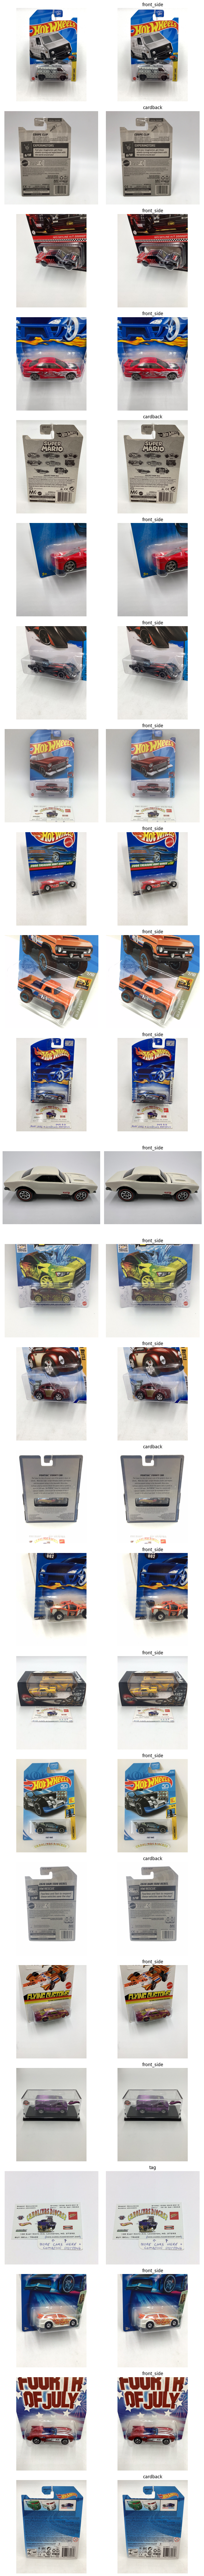

In [16]:
# Display
fig, axes = plt.subplots(nrows=25, ncols=2, figsize=(8, 100))  # Large height

for i, path in enumerate(sampled_paths):
    image = Image.open(path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        output = model(input_tensor)
        _, pred_idx = torch.max(output, 1)
        predicted_label = CLASS_NAMES[pred_idx.item()]

    # Left: original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis("off")

    # Right: same image with predicted label
    axes[i, 1].imshow(image)
    axes[i, 1].set_title(f"{predicted_label}", fontsize=12)
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>